<a href="https://colab.research.google.com/github/robinsingh2022/NorthwesternMSDS422/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Ingest

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras import datasets,layers,models

In [ ]:

!unzip /content/drive/MyDrive/Assignment7/train.zip 

Archive:  /content/drive/MyDrive/Assignment7/train.zip
replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!unzip /content/drive/MyDrive/Assignment7/test.zip 

Archive:  /content/drive/MyDrive/Assignment7/test.zip
replace test/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


###EDA

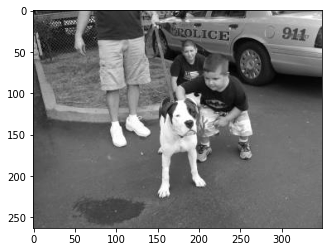

In [ ]:
for img in os.listdir("/content/train"):
  array= cv2.imread(os.path.join("/content/train",img),cv2.IMREAD_GRAYSCALE)
  plt.imshow(array,cmap="gray")
  plt.show()
  break

In [ ]:
print(array)

[[ 39  25  28 ... 132 137 138]
 [ 68  12  12 ... 147 144 141]
 [123  25  32 ... 180 178 177]
 ...
 [ 91  88  85 ... 102 101 101]
 [ 92  89  87 ... 103 101  99]
 [ 89  88  88 ... 103 101 100]]


In [ ]:
#with help from sentdex on YouTube: https://www.youtube.com/watch?v=j-3vuBynnOE&ab_channel=sentdex
trainData = []
for img in os.listdir("/content/train"):

    path = os.path.join("/content/train",img)
    img= cv2.resize(cv2.imread(os.path.join("/content/train",img)),(70,70))
    trainData.append([np.array(img)])
    


In [ ]:
trainData[:5]


[[array([[[ 17,  19,  20],
          [ 50,  58,  58],
          [ 59,  62,  63],
          ...,
          [168, 155, 143],
          [181, 167, 156],
          [175, 161, 150]],
  
         [[ 73,  65,  66],
          [ 73,  75,  72],
          [109, 104, 104],
          ...,
          [226, 214, 208],
          [235, 223, 217],
          [225, 214, 208]],
  
         [[ 83, 100,  91],
          [ 90, 115, 102],
          [ 75,  92,  83],
          ...,
          [251, 238, 232],
          [230, 218, 211],
          [230, 216, 210]],
  
         ...,
  
         [[ 95,  90,  89],
          [ 95,  90,  89],
          [ 93,  88,  87],
          ...,
          [121, 111, 111],
          [119, 109, 109],
          [115, 105, 105]],
  
         [[ 95,  91,  89],
          [108, 103, 102],
          [ 95,  90,  89],
          ...,
          [121, 113, 114],
          [122, 114, 115],
          [115, 102, 104]],
  
         [[ 91,  86,  85],
          [ 88,  83,  82],
          [116, 111, 110

In [ ]:
x = np.array([i[0] for i in trainData])


In [ ]:
x[0].shape

(70, 70, 3)

In [ ]:
x.shape


(25000, 70, 70, 3)

In [ ]:
tag=[]
for img in os.listdir("/content/train"):
  word_label = img.split('.')[-3]
  if word_label == 'cat': 
    label=0
    
  elif word_label == 'dog': 
    label=1

  tag.append([label])



In [ ]:
y=[i for i in tag]

In [ ]:
y=np.array(y)

In [ ]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y=y.reshape(-1,)

In [ ]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
len(y)

25000

In [ ]:
type(x)

numpy.ndarray

[[[111 108 102]
  [210 200 200]
  [213 208 204]
  ...
  [ 19  16  17]
  [ 17  15  15]
  [  8   6   6]]

 [[133 127 121]
  [213 206 207]
  [205 201 199]
  ...
  [ 26  23  24]
  [ 18  16  16]
  [  9   7   7]]

 [[136 128 120]
  [204 199 200]
  [205 206 206]
  ...
  [ 25  22  22]
  [ 20  18  18]
  [ 15  13  13]]

 ...

 [[152 165 180]
  [155 169 183]
  [159 172 187]
  ...
  [140 149 157]
  [127 136 145]
  [127 136 145]]

 [[158 170 182]
  [157 169 181]
  [188 200 212]
  ...
  [125 134 143]
  [136 145 154]
  [139 148 157]]

 [[149 160 170]
  [164 175 185]
  [167 178 188]
  ...
  [132 141 149]
  [145 154 163]
  [143 152 161]]]
[0]


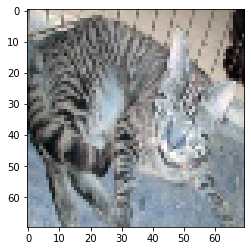

In [ ]:
z=23

for i in trainData[z]:
  print(i)
  print(tag[z])
  plt.imshow(i)
 

  

In [ ]:
z=5
for i in trainData[z]:
  print(i)



[[[123 148 144]
  [124 149 145]
  [125 150 146]
  ...
  [211 215 210]
  [214 218 213]
  [210 216 211]]

 [[126 151 147]
  [135 160 156]
  [125 150 146]
  ...
  [214 218 213]
  [211 215 210]
  [212 218 213]]

 [[124 149 145]
  [136 161 157]
  [130 155 151]
  ...
  [213 219 214]
  [210 216 211]
  [208 214 209]]

 ...

 [[ 97 102 100]
  [ 95 104 101]
  [ 44  49  47]
  ...
  [ 40  46  13]
  [ 40  45  13]
  [ 38  44   9]]

 [[ 87  96  93]
  [ 72  88  83]
  [104 109 107]
  ...
  [ 40  45  13]
  [ 41  46  14]
  [ 41  47  12]]

 [[103 109 104]
  [108 114 109]
  [105 116 113]
  ...
  [ 38  46  16]
  [ 37  45  15]
  [ 38  46  15]]]


Text(0.5, 0, 'dog')

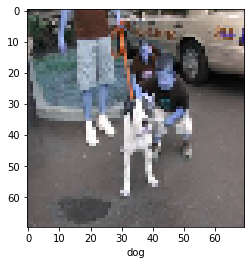

In [ ]:
categories=['cat','dog']
plt.imshow(x[0])
plt.xlabel(categories[y[0]])

In [ ]:
x[3].shape

(70, 70, 3)

###Models

Basic Neural Network, Just to See How it Performs

In [ ]:
model=models.Sequential([
    layers.Flatten(input_shape=(70,70,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(2,activation='sigmoid')
])
model.compile(optimizer='SGD',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x, y, epochs=5)

Epoch 1/5
782/782 [==============================] - 161s 205ms/step - loss: nan - accuracy: 0.4957
Epoch 2/5
782/782 [==============================] - 159s 204ms/step - loss: nan - accuracy: 0.4954
Epoch 3/5
782/782 [==============================] - 162s 207ms/step - loss: nan - accuracy: 0.4991
Epoch 4/5
782/782 [==============================] - 158s 202ms/step - loss: nan - accuracy: 0.4995
Epoch 5/5
782/782 [==============================] - 161s 205ms/step - loss: nan - accuracy: 0.5032


Actual CNN

In [ ]:
cnnmodel=models.Sequential([
                                                      
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(70,70,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),    
    layers.Dense(2,activation='softmax')
])
cnnmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnnmodel.fit(x,y,epochs=10)

Epoch 1/10
782/782 [==============================] - 152s 193ms/step - loss: 10.2340 - accuracy: 0.5600
Epoch 2/10
782/782 [==============================] - 160s 205ms/step - loss: 0.6016 - accuracy: 0.6736
Epoch 3/10
782/782 [==============================] - 150s 192ms/step - loss: 0.5147 - accuracy: 0.7448
Epoch 4/10
782/782 [==============================] - 150s 192ms/step - loss: 0.4276 - accuracy: 0.7970
Epoch 5/10
782/782 [==============================] - 149s 190ms/step - loss: 0.3701 - accuracy: 0.8320
Epoch 6/10
782/782 [==============================] - 150s 191ms/step - loss: 0.3159 - accuracy: 0.8610
Epoch 7/10
782/782 [==============================] - 150s 192ms/step - loss: 0.2763 - accuracy: 0.8796
Epoch 8/10
782/782 [==============================] - 150s 192ms/step - loss: 0.2398 - accuracy: 0.8975
Epoch 9/10
782/782 [==============================] - 150s 191ms/step - loss: 0.2193 - accuracy: 0.9100
Epoch 10/10
782/782 [==============================] - 153s 196

In [ ]:
prediction = cnnmodel.predict(x)

In [ ]:
prediction[:5]

array([[2.0232535e-10, 1.0000000e+00],
       [2.4119393e-04, 9.9975878e-01],
       [5.1105201e-01, 4.8894802e-01],
       [1.1459615e-02, 9.8854035e-01],
       [2.5089243e-01, 7.4910754e-01]], dtype=float32)

In [ ]:
np.argmax(prediction[0])

1

In [ ]:
y[1]

1

In [ ]:
np.argmax(prediction[100])

1

In [ ]:
y[100]

0

In [ ]:
predicted=[np.argmax(i) for i in prediction]
predicted[:5]

[1, 1, 0, 1, 1]

In [ ]:
#with help from sentdex on YouTube: https://www.youtube.com/watch?v=j-3vuBynnOE&ab_channel=sentdex
testData = []
for img in os.listdir("/content/test"):

    path = os.path.join("/content/test",img)
    img= cv2.resize(cv2.imread(os.path.join("/content/test",img)),(70,70))
    testData.append([np.array(img)])
    


In [ ]:
testx = np.array([i[0] for i in testData])
testx[:5]

array([[[[107, 111, 112],
         [110, 114, 115],
         [110, 114, 115],
         ...,
         [112, 125, 131],
         [123, 135, 141],
         [108, 120, 126]],

        [[102, 106, 107],
         [110, 114, 115],
         [117, 121, 122],
         ...,
         [114, 125, 132],
         [124, 136, 142],
         [112, 124, 130]],

        [[115, 119, 120],
         [120, 124, 125],
         [120, 124, 125],
         ...,
         [121, 133, 139],
         [105, 117, 123],
         [ 94, 106, 112]],

        ...,

        [[150, 155, 154],
         [148, 153, 152],
         [162, 167, 166],
         ...,
         [172, 176, 177],
         [171, 175, 176],
         [172, 176, 177]],

        [[147, 149, 150],
         [161, 164, 164],
         [163, 165, 166],
         ...,
         [173, 177, 178],
         [169, 173, 174],
         [169, 173, 174]],

        [[148, 150, 151],
         [162, 164, 165],
         [164, 166, 167],
         ...,
         [163, 167, 168],
        

In [ ]:
testPrediction = cnnmodel.predict(testx)
testPrediction

array([[0.0016965 , 0.99830353],
       [0.04949826, 0.9505017 ],
       [0.00805462, 0.9919453 ],
       ...,
       [0.08686538, 0.91313463],
       [0.7025616 , 0.2974384 ],
       [0.05984205, 0.94015795]], dtype=float32)

In [ ]:
dogProb = [i[1] for i in testPrediction]
print(dogProb)

[0.99830353, 0.9505017, 0.9919453, 0.8847518, 4.4436806e-06, 0.87858725, 0.96492255, 0.9971486, 0.13972647, 0.99999416, 0.06454196, 0.99999833, 0.557481, 1.0, 0.99981695, 0.9858747, 0.8892412, 0.54677784, 0.7106705, 0.98000413, 0.9634032, 0.99691015, 0.032305196, 0.99949527, 0.14709564, 0.58541715, 0.9234721, 0.9951474, 0.78636307, 0.99997556, 0.98357093, 0.9692327, 0.7108051, 0.22198102, 0.2974384, 0.0028252082, 0.0003427709, 0.99873763, 0.9627075, 0.96726626, 0.94083923, 0.9012048, 0.9659542, 0.0005256695, 0.9275279, 0.076430514, 0.0015119223, 0.9921381, 0.9974178, 0.16424374, 0.8950183, 0.001355097, 0.81577647, 0.8826388, 0.45768052, 0.15597686, 0.4324497, 0.9858543, 0.0013426386, 0.923757, 0.99999213, 0.75244516, 0.9892814, 0.863458, 0.0039899917, 0.23332419, 0.058561984, 0.9988356, 0.97088414, 0.99735814, 0.9404542, 0.99185014, 0.048079386, 0.20744193, 0.01473312, 0.99780005, 0.914158, 0.764289, 0.91148204, 0.6003108, 0.038900502, 0.9848283, 0.00485479, 0.00066711864, 0.9980248, 0

In [ ]:
submissionAssignment7 = pd.DataFrame({'id': list(range(1, len(dogProb)+1)), 'label': dogProb})
submissionAssignment7.to_csv('submissionAssignment7.csv', index=False)

Kaggle Score=3.21697

In [ ]:
cnnmodel=models.Sequential([
                                                      
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(70,70,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),    
    layers.Dense(2,activation='softmax')
])
cnnmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnnmodel.fit(x,y,epochs=10)

Epoch 1/10
782/782 [==============================] - 203s 259ms/step - loss: 4.7869 - accuracy: 0.5521
Epoch 2/10
782/782 [==============================] - 201s 258ms/step - loss: 0.6830 - accuracy: 0.5560
Epoch 3/10
782/782 [==============================] - 211s 269ms/step - loss: 0.6823 - accuracy: 0.5561
Epoch 4/10
782/782 [==============================] - 203s 259ms/step - loss: 0.6761 - accuracy: 0.5579
Epoch 5/10
782/782 [==============================] - 202s 259ms/step - loss: 0.6511 - accuracy: 0.6158
Epoch 6/10
782/782 [==============================] - 204s 261ms/step - loss: 0.6010 - accuracy: 0.6746
Epoch 7/10
782/782 [==============================] - 200s 256ms/step - loss: 0.5566 - accuracy: 0.7145
Epoch 8/10
782/782 [==============================] - 200s 255ms/step - loss: 0.4991 - accuracy: 0.7602
Epoch 9/10
782/782 [==============================] - 199s 255ms/step - loss: 0.4487 - accuracy: 0.7873
Epoch 10/10
782/782 [==============================] - 201s 257m

In [ ]:
testPrediction = cnnmodel.predict(testx)
testPrediction

array([[0.72930086, 0.27069914],
       [0.7961589 , 0.2038411 ],
       [0.6064426 , 0.39355752],
       ...,
       [0.89180475, 0.10819521],
       [0.53391075, 0.46608928],
       [0.50025195, 0.49974802]], dtype=float32)

In [ ]:
dogProb = [i[1] for i in testPrediction]
print(dogProb)

[0.27069914, 0.2038411, 0.39355752, 0.036043096, 0.7755334, 0.56802744, 0.39360788, 0.9634396, 0.045666173, 0.74093187, 0.7900891, 0.2042037, 0.11245883, 0.99476117, 0.93500537, 0.78482115, 0.5799668, 0.9773341, 0.11444863, 0.9969506, 0.9844528, 0.033925254, 0.10188273, 0.8336251, 0.35118905, 0.9999726, 0.99985933, 0.3237249, 0.85601795, 0.8772532, 0.011833427, 0.34664524, 0.31934536, 0.999589, 0.97199595, 0.30711514, 0.99929774, 0.125456, 0.98729867, 0.34501603, 0.04307572, 0.9999658, 0.9845941, 0.0075344443, 0.9669443, 0.26393348, 0.18486936, 0.9969518, 0.26660004, 0.9154807, 0.9947838, 0.19836478, 0.99722904, 0.7169516, 0.69996244, 0.7991726, 0.6040516, 0.97500336, 0.8920277, 0.1822923, 0.5642681, 0.9929658, 0.07923098, 0.24024191, 0.13000675, 0.9877109, 0.97113943, 0.10599153, 0.44238633, 0.7030203, 0.8122022, 0.6706209, 0.32807672, 0.25407815, 0.6075169, 0.26284695, 0.9616331, 0.98639107, 0.97037154, 0.9266829, 0.98979914, 0.5507753, 0.8989233, 0.91436774, 0.93769675, 0.9431187, 0

Kaggle Score= 1.45230

In [ ]:
submissionAssignment7_2 = pd.DataFrame({'id': list(range(1, len(dogProb)+1)), 'label': dogProb})
submissionAssignment7_2.to_csv('submissionAssignment7_2.csv', index=False)

In [ ]:
cnnmodel=models.Sequential([
                                                      
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(70,70,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),    
    layers.Dense(2,activation='softmax')
])
cnnmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnnmodel.fit(x,y,epochs=20)

Epoch 1/20
782/782 [==============================] - 150s 191ms/step - loss: 12.9620 - accuracy: 0.5533
Epoch 2/20
782/782 [==============================] - 152s 194ms/step - loss: 0.6238 - accuracy: 0.6536
Epoch 3/20
782/782 [==============================] - 151s 193ms/step - loss: 0.5746 - accuracy: 0.6963
Epoch 4/20
782/782 [==============================] - 149s 191ms/step - loss: 0.5299 - accuracy: 0.7307
Epoch 5/20
782/782 [==============================] - 152s 194ms/step - loss: 0.4675 - accuracy: 0.7709
Epoch 6/20
782/782 [==============================] - 153s 195ms/step - loss: 0.4002 - accuracy: 0.8140
Epoch 7/20
782/782 [==============================] - 149s 191ms/step - loss: 0.3258 - accuracy: 0.8545
Epoch 8/20
782/782 [==============================] - 152s 195ms/step - loss: 0.2668 - accuracy: 0.8833
Epoch 9/20
782/782 [==============================] - 149s 190ms/step - loss: 0.2030 - accuracy: 0.9133
Epoch 10/20
782/782 [==============================] - 153s 196

In [ ]:
testPrediction = cnnmodel.predict(testx)
testPrediction

array([[2.2639529e-06, 9.9999774e-01],
       [1.2566167e-02, 9.8743385e-01],
       [4.8984671e-08, 1.0000000e+00],
       ...,
       [8.4690350e-01, 1.5309645e-01],
       [9.9999011e-01, 9.9242334e-06],
       [9.9803048e-01, 1.9695463e-03]], dtype=float32)

In [ ]:
dogProb = [i[1] for i in testPrediction]
print(dogProb)

[0.99999774, 0.98743385, 1.0, 4.4768074e-09, 2.4532438e-08, 0.99868673, 1.3167785e-08, 1.0, 4.9772914e-10, 0.047962695, 0.25781414, 0.052985102, 6.67428e-09, 0.99999976, 0.99999976, 0.9961577, 0.98955417, 0.9760972, 2.2918594e-14, 0.98280245, 1.0, 5.4558304e-06, 0.99362, 0.93836313, 0.6727587, 0.9999976, 1.0, 0.5572627, 0.9966763, 0.99999976, 4.6365017e-07, 3.096303e-08, 0.83633775, 0.99999917, 0.9999994, 0.093355715, 0.99999213, 6.8876516e-10, 1.0, 2.7242786e-05, 0.0005051531, 1.0, 1.0, 1.8909152e-25, 0.9999999, 1.9213165e-05, 0.9999999, 0.9999994, 1.0, 0.000109528635, 0.99999976, 0.34314138, 1.0, 2.0353535e-05, 0.99984896, 0.99752706, 0.9237018, 0.7425426, 0.9997725, 0.09866941, 0.037366852, 0.99999404, 3.051354e-15, 0.08808468, 0.54370713, 0.9896926, 0.951637, 2.6976798e-18, 0.023915585, 0.95654815, 0.86448395, 1.0, 0.9800582, 1.3817697e-05, 1.6848254e-07, 0.9999883, 0.008144285, 0.99942315, 0.9999826, 0.6455785, 1.0, 0.0031863903, 1.0, 0.02643607, 0.9973105, 0.99949706, 0.9989273, 

In [ ]:
submissionAssignment7_3 = pd.DataFrame({'id': list(range(1, len(dogProb)+1)), 'label': dogProb})
submissionAssignment7_3.to_csv('submissionAssignment7_3.csv', index=False)

Kaggle Score = 5.84238

In [ ]:
cnnmodel=models.Sequential([
                                                      
    layers.Conv2D(filters=16, kernel_size=(3,3),activation='relu', input_shape=(70,70,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),    
    layers.Dense(2,activation='softmax')
])
cnnmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnnmodel.fit(x,y,epochs=10)

Epoch 1/10
782/782 [==============================] - 104s 133ms/step - loss: 1.1517 - accuracy: 0.5945
Epoch 2/10
782/782 [==============================] - 103s 132ms/step - loss: 0.5692 - accuracy: 0.7038
Epoch 3/10
782/782 [==============================] - 104s 133ms/step - loss: 0.5035 - accuracy: 0.7502
Epoch 4/10
782/782 [==============================] - 103s 132ms/step - loss: 0.4484 - accuracy: 0.7892
Epoch 5/10
782/782 [==============================] - 105s 134ms/step - loss: 0.4039 - accuracy: 0.8138
Epoch 6/10
782/782 [==============================] - 105s 134ms/step - loss: 0.3622 - accuracy: 0.8369
Epoch 7/10
782/782 [==============================] - 106s 135ms/step - loss: 0.3330 - accuracy: 0.8508
Epoch 8/10
782/782 [==============================] - 105s 134ms/step - loss: 0.2860 - accuracy: 0.8764
Epoch 9/10
782/782 [==============================] - 103s 132ms/step - loss: 0.2472 - accuracy: 0.8965
Epoch 10/10
782/782 [==============================] - 105s 134m

In [ ]:
testPrediction = cnnmodel.predict(testx)
dogProb = [i[1] for i in testPrediction]
submissionAssignment7_4 = pd.DataFrame({'id': list(range(1, len(dogProb)+1)), 'label': dogProb})
submissionAssignment7_4.to_csv('submissionAssignment7_4.csv', index=False)

Kaggle Score=2.00826

###Conclusion

If I was providing advice to a website provider who is looking for tools to automatically label images provided by end users and we are we are most concerned about achieving the highest possible accuracy in image classification meaning we are willing to sacrifice training time for model accuracy, I would recommend using the convolutional neural network. This works better than the basic neural network that we used last week as these images are bigger in size and are more detailed. The network we should use should consist of a few layers, probably like three or four if of a similar size as assignment 7’s dataset, as well as not have too many nodes in the layers so it does not overfit. What I learned last week when conducting models was that the number of epochs may have a greater impact than number of layers in a convolutional neural network. This may be because the model gets more time to learn and understand the data, learning the trends and what specific details may differentiate one result from another. This week this was not the case. The number of layers and neurons within the convolutional neural network are still important as it can then parse through the data with more detail and learn about even the smallest of details which may change the result to become more accurate. The best images may be the ones that are similarly sized and may be quite easily differentiable. We can use this model to analyze high resolution versions of the photos rather than such small resolution ones as used in this model. That will take a lot more time, but may result in a more accurate model.